# Marketing segmention example

## Import the relevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Load the data

In [4]:
data = pd.read_csv('3.12. Example.csv')

In [6]:
data.head()

Satisfaction  Loyalty
0             4    -1.33
1             6    -0.28
2             5    -0.99
3             7    -0.29
4             4     1.06

### Plot the data

Text(0, 0.5, 'Loyalty')

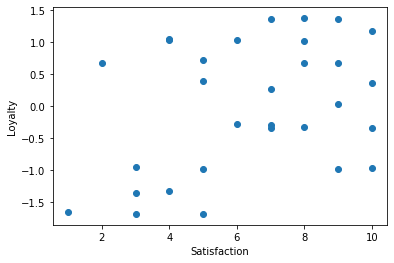

In [7]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

### Select the features

In [18]:
x = data.copy()

### Clustering

In [19]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clusterring resukts

In [20]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

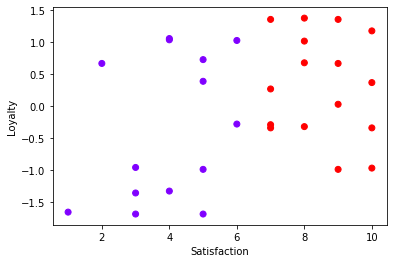

In [21]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

### Standardize the variables

In [25]:
from sklearn import preprocessing 
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

x_scaled contient la version Standardisée de "satisfaction" et les mêmes valeurs pour "Loyalty"(Étaient déjà standardisées)

### Take avantage of the Elbow method

In [26]:
wcss=[]

for i in range(1,10):
    kmeans =  KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[60.0,
 29.818973034723147,
 18.05848501494003,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.34807941029098,
 4.387789628893001,
 3.7799886162052663]

Text(0, 0.5, 'Within-clusters sum of squares')

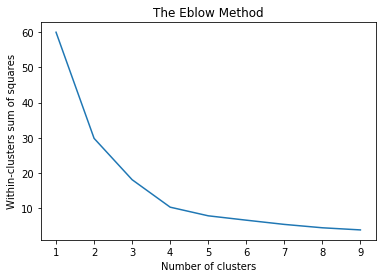

In [27]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title("The Eblow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-clusters sum of squares")

### Explore clustering solutions and select the number of clusters

In [41]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [42]:
cluster_new

Satisfaction  Loyalty  cluster_pred
0              4    -1.33             0
1              6    -0.28             1
2              5    -0.99             0
3              7    -0.29             1
4              4     1.06             2
5              1    -1.66             0
6             10    -0.97             1
7              8    -0.32             1
8              8     1.02             1
9              8     0.68             1
10            10    -0.34             1
11             5     0.39             2
12             5    -1.69             0
13             2     0.67             2
14             7     0.27             1
15             9     1.36             1
16             8     1.38             1
17             7     1.36             2
18             7    -0.34             1
19             9     0.67             1
20            10     1.18             1
21             3    -1.69             0
22             4     1.04             2
23             3    -0.96             0
24             6     1.03             2
25             9    -0.99             1
26            10     0.37             1
27             9     0.03             1
28             3    -1.36             0
29             5     0.73             2

Text(0, 0.5, 'Loyalty')

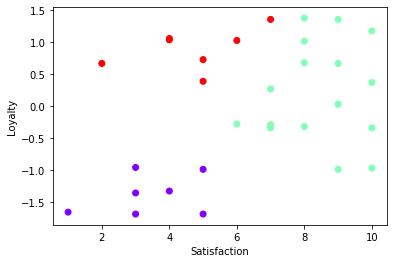

In [43]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_pred'], cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")